In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/rice_npk'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 926 images belonging to 3 classes.
Found 230 images belonging to 3 classes.


In [ ]:
import os

# Path to the main folder
data_path = '/content/drive/MyDrive/rice_npk'

# List the class folders
class_folders = os.listdir(data_path)

# Count the images in each folder
for class_folder in class_folders:
    folder_path = os.path.join(data_path, class_folder)
    num_images = len(os.listdir(folder_path))
    print(f"{class_folder}: {num_images} images")


Nitrogen: 440 images
Phosphorus: 333 images
Potassium: 383 images


In [ ]:
import os

path = '/content/drive/MyDrive/rice_npk'
print(sorted(os.listdir(path)))


['Nitrogen', 'Phosphorus', 'Potassium']


In [ ]:
print(train_data.class_indices)


{'Nitrogen': 0, 'Phosphorus': 1, 'Potassium': 2}


In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


In [ ]:
def preprocess_image(img_path, size=(128, 128)):
    img = cv2.imread(img_path)
    if img is None:
        return None

    # Resize to standard size
    img = cv2.resize(img, size)

    # Convert to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    enhanced_img = cv2.merge((cl, a, b))

    # Convert back to BGR
    img = cv2.cvtColor(enhanced_img, cv2.COLOR_LAB2BGR)

    # Apply Gaussian blur to reduce noise
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # Normalize pixel values to [0, 1]
    img = img.astype(np.float32) / 255.0

    # Convert BGR to RGB
    img = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_BGR2RGB) / 255.0

    return img


In [ ]:
import os

# List files in Nitrogen folder
folder_path = '/content/drive/MyDrive/rice_npk/Nitrogen'
files = os.listdir(folder_path)

# Show first 5 files
print(files[:5])


['untitled-119.JPG', 'untitled-108.JPG', 'untitled-106.JPG', 'untitled-121.JPG', 'untitled-112.JPG']


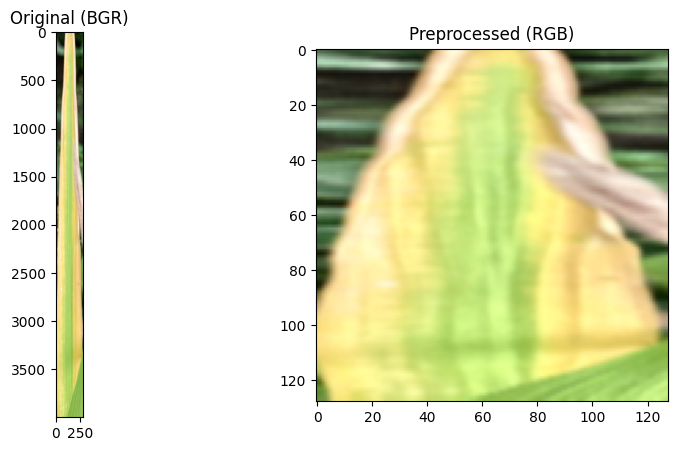

In [ ]:
# Use a real file path from your folder
test_image_path = '/content/drive/MyDrive/rice_npk/Nitrogen/untitled-119.JPG'

# Read and preprocess
original = cv2.imread(test_image_path)
processed = preprocess_image(test_image_path)

# Show original and processed
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original (BGR)")
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Preprocessed (RGB)")
plt.imshow(processed)
plt.show()


In [ ]:
import os
from tqdm import tqdm

# Set the dataset path
dataset_path = '/content/drive/MyDrive/rice_npk'

# Label mapping
label_map = {
    'Nitrogen': 0,
    'Phosphorus': 1,
    'Potassium': 2
}

X = []
y = []

# Loop through each class
for label_name, label_value in label_map.items():
    class_path = os.path.join(dataset_path, label_name)
    image_files = os.listdir(class_path)

    print(f"Processing {label_name} with {len(image_files)} images...")

    for img_name in tqdm(image_files):
        img_path = os.path.join(class_path, img_name)
        img = preprocess_image(img_path)

        if img is not None:
            X.append(img)
            y.append(label_value)


Processing Nitrogen with 440 images...


100%|██████████| 440/440 [00:31<00:00, 14.19it/s]


Processing Phosphorus with 333 images...


100%|██████████| 333/333 [00:21<00:00, 15.16it/s]


Processing Potassium with 383 images...


100%|██████████| 383/383 [00:32<00:00, 11.97it/s]


In [ ]:
X = np.array(X)
y = np.array(y)

print("Data shapes:")
print("X:", X.shape)
print("y:", y.shape)


Data shapes:
X: (1156, 128, 128, 3)
y: (1156,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (924, 128, 128, 3)
Testing data shape: (232, 128, 128, 3)


In [ ]:
import cv2
import numpy as np
import os
from tqdm import tqdm
from matplotlib import pyplot as plt


In [ ]:
from google.colab.patches import cv2_imshow  # For displaying images in Colab

def segment_leaf(image):
    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Define green color range in HSV
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([85, 255, 255])

    # Create mask for green areas
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Apply mask
    result = cv2.bitwise_and(image, image, mask=mask)

    return result


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Open file browser
!ls "/content/drive/MyDrive"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'   Resume.gdoc   rice_npk


In [ ]:
!ls "/content/drive/MyDrive/rice_npk"


Nitrogen  Phosphorus  Potassium


In [ ]:
import os
from tqdm import tqdm
import cv2
import numpy as np

DATA_DIR = "/content/drive/MyDrive/rice_npk"
CATEGORIES = ["Nitrogen", "Phosphorus", "Potassium"]

X = []
y = []

for idx, category in enumerate(CATEGORIES):
    folder = os.path.join(DATA_DIR, category)
    print(f"Processing {category} with {len(os.listdir(folder))} images...")

    for file in tqdm(os.listdir(folder)):
        img_path = os.path.join(folder, file)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))  # Resize to a consistent size
            X.append(img)
            y.append(idx)
        except:
            print(f"Could not read: {img_path}")

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


Processing Nitrogen with 440 images...


100%|██████████| 440/440 [00:13<00:00, 33.37it/s]


Processing Phosphorus with 333 images...


100%|██████████| 333/333 [00:10<00:00, 30.87it/s]


Processing Potassium with 383 images...


100%|██████████| 383/383 [00:13<00:00, 27.83it/s]

X shape: (1156, 128, 128, 3)
y shape: (1156,)


In [ ]:
import os

# Look for your rice_npk folder and subfolders
for root, dirs, files in os.walk("/content/drive/MyDrive/"):
    if 'rice_npk' in root:
        print(root)


/content/drive/MyDrive/rice_npk
/content/drive/MyDrive/rice_npk/Nitrogen
/content/drive/MyDrive/rice_npk/Phosphorus
/content/drive/MyDrive/rice_npk/Potassium


In [ ]:
import cv2
import numpy as np

def segment_leaf(image):
    # Convert image to HSV (Hue, Saturation, Value) color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for the green color range in HSV
    lower = np.array([25, 40, 40])  # lower bound for green
    upper = np.array([85, 255, 255])  # upper bound for green

    # Create a mask to isolate the green color (leaf area)
    mask = cv2.inRange(hsv, lower, upper)

    # Apply the mask to get the leaf part of the image
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    return segmented_image


In [ ]:
import os
from tqdm import tqdm
import cv2
import numpy as np

# Paths and categories
DATA_DIR = "/content/drive/MyDrive/rice_npk"
CATEGORIES = ["Nitrogen", "Phosphorus", "Potassium"]

X = []  # To store images
y = []  # To store labels

# Process images
for idx, category in enumerate(CATEGORIES):
    folder = os.path.join(DATA_DIR, category)
    print(f"Processing {category} with {len(os.listdir(folder))} images...")

    for file in tqdm(os.listdir(folder)):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)

        if img is None:  # Skip invalid images
            continue

        # Apply segmentation
        segmented_img = segment_leaf(img)

        # Resize to 128x128
        resized_img = cv2.resize(segmented_img, (128, 128))

        # Add the segmented and resized image to X, and the label to y
        X.append(resized_img)
        y.append(idx)

# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

# Check the shapes
print("After segmentation & resize:")
print("X shape:", X.shape)
print("y shape:", y.shape)


Processing Nitrogen with 440 images...


100%|██████████| 440/440 [00:15<00:00, 28.32it/s]


Processing Phosphorus with 333 images...


100%|██████████| 333/333 [00:14<00:00, 23.05it/s]


Processing Potassium with 383 images...


100%|██████████| 383/383 [00:18<00:00, 20.26it/s]

After segmentation & resize:
X shape: (1156, 128, 128, 3)
y shape: (1156,)


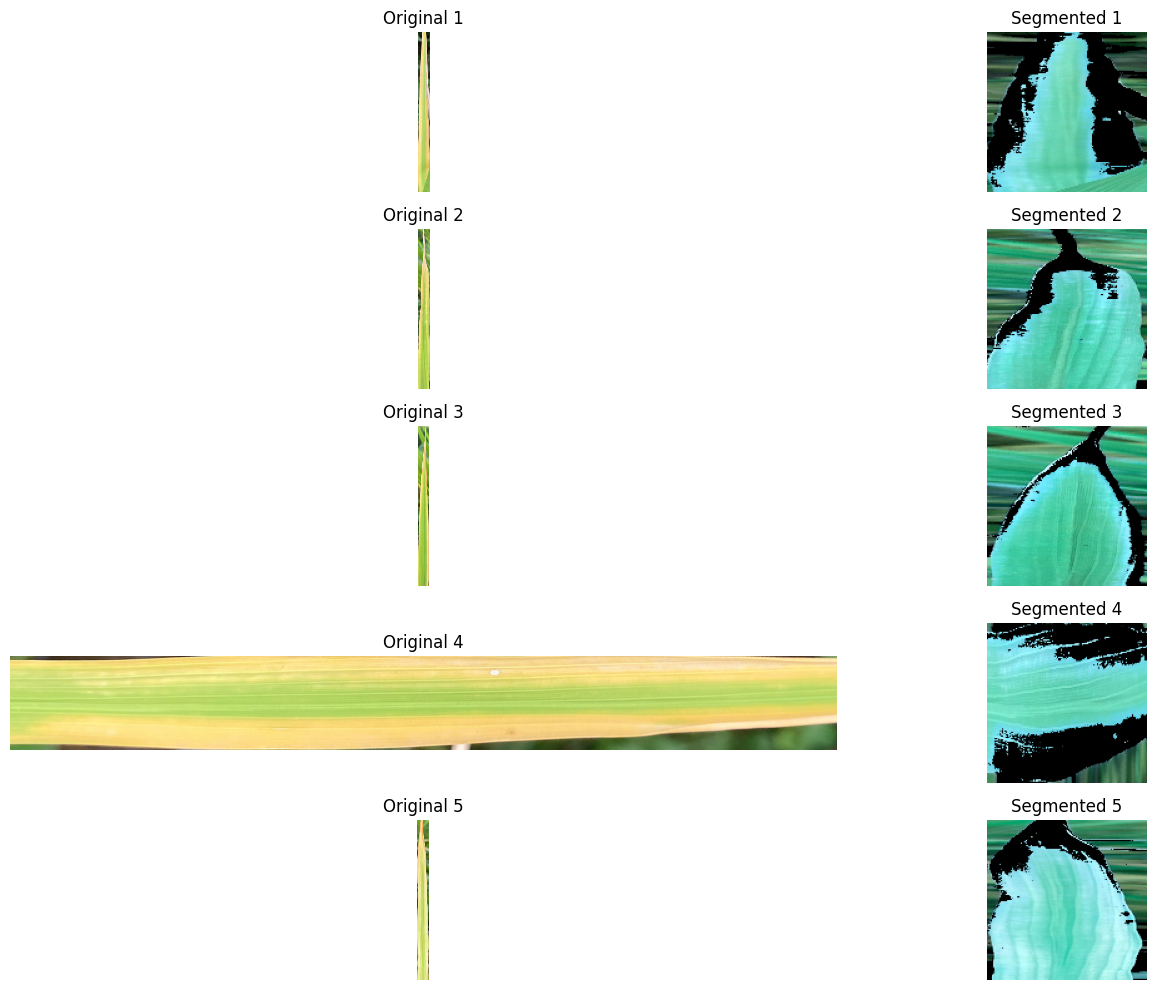

In [ ]:
# Show multiple images
num_samples = 5  # Number of images to display
plt.figure(figsize=(15, 10))

for i in range(num_samples):
    # Original image
    original_img = cv2.imread(os.path.join(DATA_DIR, CATEGORIES[0], os.listdir(os.path.join(DATA_DIR, CATEGORIES[0]))[i]))
    original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # Segmented image
    segmented_img = X[i]

    # Plot both images side by side
    plt.subplot(num_samples, 2, 2*i + 1)
    plt.imshow(original_img_rgb)
    plt.title(f"Original {i+1}")
    plt.axis('off')

    plt.subplot(num_samples, 2, 2*i + 2)
    plt.imshow(segmented_img)
    plt.title(f"Segmented {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
X = np.array(X)  # Convert the list to a numpy array
X = X / 255.0    # Normalize the pixel values


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 output classes (N, P, K)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=65, validation_data=(X_test, y_test))


Epoch 1/65
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.3532 - loss: 1.2555 - val_accuracy: 0.6250 - val_loss: 0.8194
Epoch 2/65
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6762 - loss: 0.7689 - val_accuracy: 0.7586 - val_loss: 0.6356
Epoch 3/65
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7110 - loss: 0.6871 - val_accuracy: 0.7629 - val_loss: 0.5455
Epoch 4/65
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8019 - loss: 0.4765 - val_accuracy: 0.7802 - val_loss: 0.5552
Epoch 5/65
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8314 - loss: 0.4604 - val_accuracy: 0.7888 - val_loss: 0.4877
Epoch 6/65
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8572 - loss: 0.3698 - val_accuracy: 0.8362 - val_loss: 0.4213
Epoch 7/65
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 991ms/step - accuracy: 0.9023 - loss: 0.2635 - val_accuracy: 0.8017 - val_loss: 0.5355
Epoch 8/65
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9196 - loss: 0.2280 - val_accuracy: 0.8319 - val_lo

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 361ms/step - accuracy: 0.8298 - loss: 0.7782
Test Accuracy: 81.90%


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step


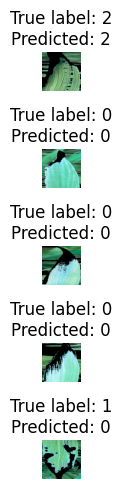

In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize predictions
plt.figure(figsize=(10, 5))

for i in range(5):  # Display 5 images
    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(X_test[i])
    plt.title(f"True label: {y_test[i]}\nPredicted: {predicted_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Get predictions from the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# Get true labels
y_true = y_test

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report for Precision, Recall (Sensitivity), F1-score
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=CATEGORIES))

# Confusion Matrix to calculate Specificity
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Extract values from confusion matrix
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TP = conf_matrix[1, 1]  # True Positives

# Specificity calculation
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step
Accuracy: 0.8190
Classification Report:
              precision    recall  f1-score   support

    Nitrogen       0.91      0.87      0.89        95
  Phosphorus       0.70      0.80      0.74        64
   Potassium       0.82      0.77      0.79        73

    accuracy                           0.82       232
   macro avg       0.81      0.81      0.81       232
weighted avg       0.83      0.82      0.82       232

Specificity: 0.9121


In [ ]:
import numpy as np
np.save('cnn_preds.npy', y_pred)


In [ ]:
import numpy as np
cnn_preds = np.load('cnn_preds.npy')


In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/Colab Notebooks/cnn_preds.npy', y_pred)


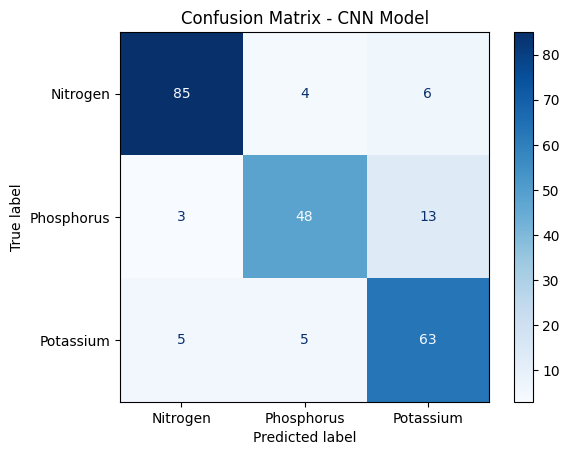

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example: assuming these are defined
# y_test → your ground truth labels (in encoded form)
# y_pred → predicted labels from CNN model
# class_names → list of class names, e.g., ['Nitrogen', 'Phosphorus', 'Potassium']

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CNN Model")
plt.show()


# **RANDOM** **FOREST**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Ensure X and y are NumPy arrays
X = np.array(X)
y = np.array(y)

# Flatten each image (128x128x3 = 49,152 features per image)
X_flat = X.reshape(X.shape[0], -1)
print("Flattened X shape:", X_flat.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42, stratify=y)


Flattened X shape: (1156, 12288)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Flatten the images (if not done already)
X_flat = X.reshape(X.shape[0], -1)

# Optional: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Grid Search for best parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5]
}

rfc = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rfc, param_grid, cv=3, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_rf = grid.best_estimator_

# Step 4: Evaluation
y_pred = best_rf.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8577586206896551
Classification Report:
               precision    recall  f1-score   support

    Nitrogen       0.94      0.93      0.93        95
  Phosphorus       0.84      0.75      0.79        64
   Potassium       0.78      0.86      0.82        73

    accuracy                           0.86       232
   macro avg       0.85      0.85      0.85       232
weighted avg       0.86      0.86      0.86       232

Confusion Matrix:
 [[88  2  5]
 [ 3 48 13]
 [ 3  7 63]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Import
from sklearn.ensemble import RandomForestClassifier

# Initialize and train (use your actual best params)
best_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
best_rf.fit(X_train, y_train)

# Predict
rf_pred = best_rf.predict(X_test)


In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/Colab Notebooks/rf_pred.npy', y_pred)


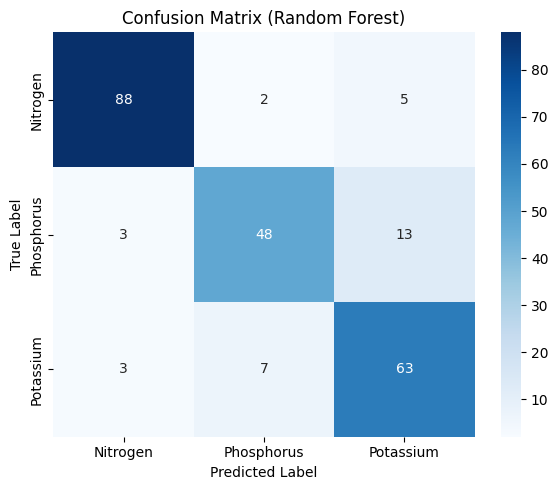

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class names
class_names = ['Nitrogen', 'Phosphorus', 'Potassium']

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Imports
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 3: Define dataset path and classes
dataset_path = '/content/drive/MyDrive/rice_npk'  # Your main folder with subfolders
class_names = sorted(os.listdir(dataset_path))  # ['Nitrogen', 'Phosphorus', 'Potassium']

print(f"Classes found: {class_names}")

# Step 4: Load images and labels
img_size = (224, 224)  # ResNet50 input size
images = []
labels = []

for label in class_names:
    folder = os.path.join(dataset_path, label)
    for img_file in os.listdir(folder):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, img_file)
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)

print(f"Total images loaded: {len(images)}")

# Step 5: Preprocess images for ResNet50
images = np.array(images)
images = preprocess_input(images)

# Step 6: Load pretrained ResNet50 (without top classification layer)
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Step 7: Extract features
features = resnet_model.predict(images, batch_size=32, verbose=1)

print(f"Features shape: {features.shape}")

# Step 8: Encode labels to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Step 9: Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)

# Step 10: Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Step 11: Predict on test set
y_pred = rf.predict(X_test)

# Step 12: Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy: {acc*100:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classes found: ['Nitrogen', 'Phosphorus', 'Potassium']
Total images loaded: 1156
37/37 ━━━━━━━━━━━━━━━━━━━━ 191s 5s/step
Features shape: (1156, 2048)
Random Forest accuracy: 91.38%

Classification Report:

              precision    recall  f1-score   support

    Nitrogen       0.96      0.97      0.96        88
  Phosphorus       0.95      0.81      0.87        67
   Potassium       0.85      0.95      0.90        77

    accuracy                           0.91       232
   macro avg       0.92      0.91      0.91       232
weighted avg       0.92      0.91      0.91       232



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classes found: ['Nitrogen', 'Phosphorus', 'Potassium']
Total images loaded: 1156
37/37 ━━━━━━━━━━━━━━━━━━━━ 197s 5s/step
Features shape: (1156, 2048)

Random Forest Accuracy: 91.38%

Classification Report:

              precision    recall  f1-score   support

    Nitrogen       0.96      0.97      0.96        88
  Phosphorus       0.95      0.81      0.87        67
   Potassium       0.85      0.95      0.90        77

    accuracy                           0.91       232
   macro avg       0.92      0.91      0.91       232
weighted avg       0.92      0.91      0.91       232



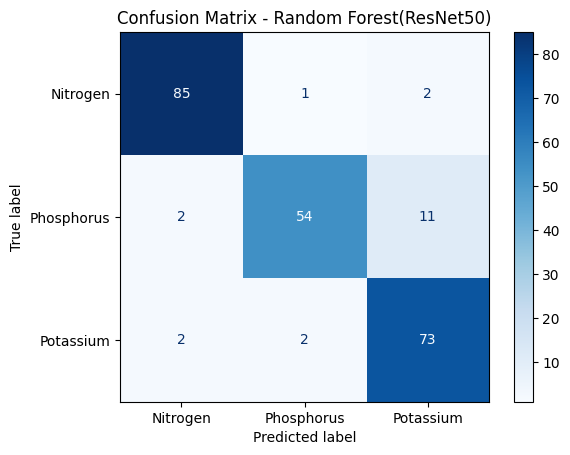

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 3: Define dataset path and classes
dataset_path = '/content/drive/MyDrive/rice_npk'
class_names = sorted(os.listdir(dataset_path))  # ['Nitrogen', 'Phosphorus', 'Potassium']
print(f"Classes found: {class_names}")

# Step 4: Load images and labels
img_size = (224, 224)
images = []
labels = []

for label in class_names:
    folder = os.path.join(dataset_path, label)
    for img_file in os.listdir(folder):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, img_file)
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)

print(f"Total images loaded: {len(images)}")

# Step 5: Preprocess images for ResNet50
images = np.array(images)
images = preprocess_input(images)

# Step 6: Load pretrained ResNet50 (without top layer)
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Step 7: Extract features
features = resnet_model.predict(images, batch_size=32, verbose=1)
print(f"Features shape: {features.shape}")

# Step 8: Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Step 9: Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)

# Step 10: Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Step 11: Predict on test set
y_pred = rf.predict(X_test)

# Step 12: Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Accuracy: {acc * 100:.2f}%\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Step 13: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest(ResNet50)")
plt.show()


HYPERPARAMETER TUNING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are ready (features + labels)

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Test set evaluation
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}%".format(test_acc * 100))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best cross-validation accuracy: 92.42%
Test set accuracy: 90.95%


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

# Randomized search with 5-fold CV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit model
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# Use best estimator for predictions
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Best cross-validation accuracy: 0.9242126909518215
Test Accuracy: 0.9137931034482759
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        88
           1       0.95      0.81      0.87        67
           2       0.84      0.96      0.90        77

    accuracy                           0.91       232
   macro avg       0.92      0.91      0.91       232
weighted avg       0.92      0.91      0.91       232



In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
data_dir = '/content/drive/MyDrive/rice_npk'
categories = ['Nitrogen', 'Phosphorus', 'Potassium']
img_size = 64  # Resize all images to 64x64

X = []
y = []

for category in categories:
    path = os.path.join(data_dir, category)
    label = category
    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(label)
        except Exception as e:
            pass

X = np.array(X)
y = np.array(y)


In [ ]:
# Flatten image data
X_flat = X.reshape(len(X), -1)

# Encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [ ]:
svm = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.8506404230317275


In [ ]:
y_pred = grid_search.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Test accuracy: 0.8491379310344828
              precision    recall  f1-score   support

    Nitrogen       0.93      0.89      0.91        88
  Phosphorus       0.77      0.88      0.82        67
   Potassium       0.85      0.78      0.81        77

    accuracy                           0.85       232
   macro avg       0.85      0.85      0.85       232
weighted avg       0.85      0.85      0.85       232



Fitting 5 folds for each of 18 candidates, totalling 90 fits


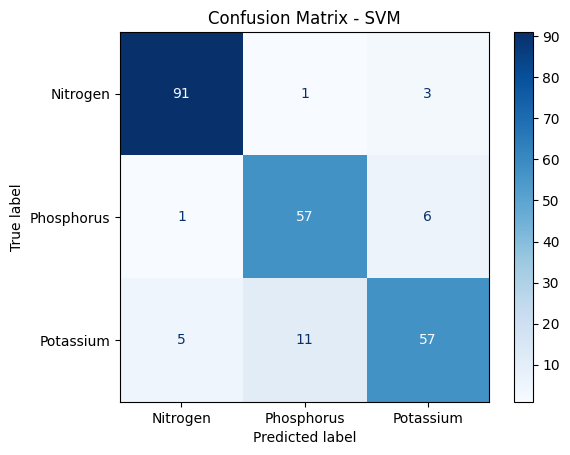

              precision    recall  f1-score   support

    Nitrogen       0.94      0.96      0.95        95
  Phosphorus       0.83      0.89      0.86        64
   Potassium       0.86      0.78      0.82        73

    accuracy                           0.88       232
   macro avg       0.88      0.88      0.88       232
weighted avg       0.88      0.88      0.88       232



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Grid search for best SVM parameters
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_svm = grid_search.best_estimator_

# Predictions
svm_pred = best_svm.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.show()

# Optional: Classification report
print(classification_report(y_test, svm_pred, target_names=le.classes_))


**LIGHTGBM**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode string labels to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 'Nitrogen' => 0, 'Phosphorus' => 1, etc.


In [ ]:
# Reshape X if it's 4D (samples, height, width, channels)
if len(X.shape) == 4:
    X = X.reshape(X.shape[0], -1)  # Flatten to (samples, features)



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# If using raw image data, flatten to (samples, features)
if len(X.shape) == 4:
    X = X.reshape(X.shape[0], -1)


In [ ]:
# Encode string labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train LightGBM
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=5)
lgb.fit(X_train, y_train)

# Predictions
from sklearn.metrics import classification_report, accuracy_score
y_pred = lgb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.521312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1987403
[LightGBM] [Info] Number of data points in the train set: 924, number of used features: 12288
[LightGBM] [Info] Start training from score -0.985168
[LightGBM] [Info] Start training from score -1.234001
[LightGBM] [Info] Start training from score -1.092140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Recreate and fit the encoder using the full y labels (original target column)
label_encoder = LabelEncoder()
label_encoder.fit(y)  # Replace `y` with your original label array before splitting


LabelEncoder()

In [ ]:
print("Sample y_test:", y_test[:5])
print("Sample y_pred:", y_pred[:5])
print("Label encoder classes:", label_encoder.classes_)


Sample y_test: [2 0 0 0 1]
Sample y_pred: [2 0 0 0 2]
Label encoder classes: ['Nitrogen' 'Phosphorus' 'Potassium']


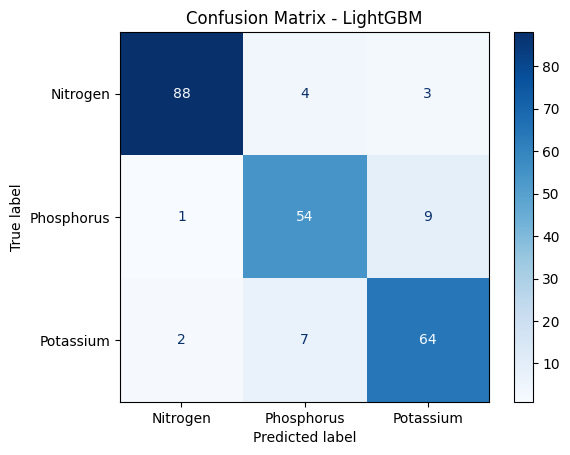

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - LightGBM")
plt.show()


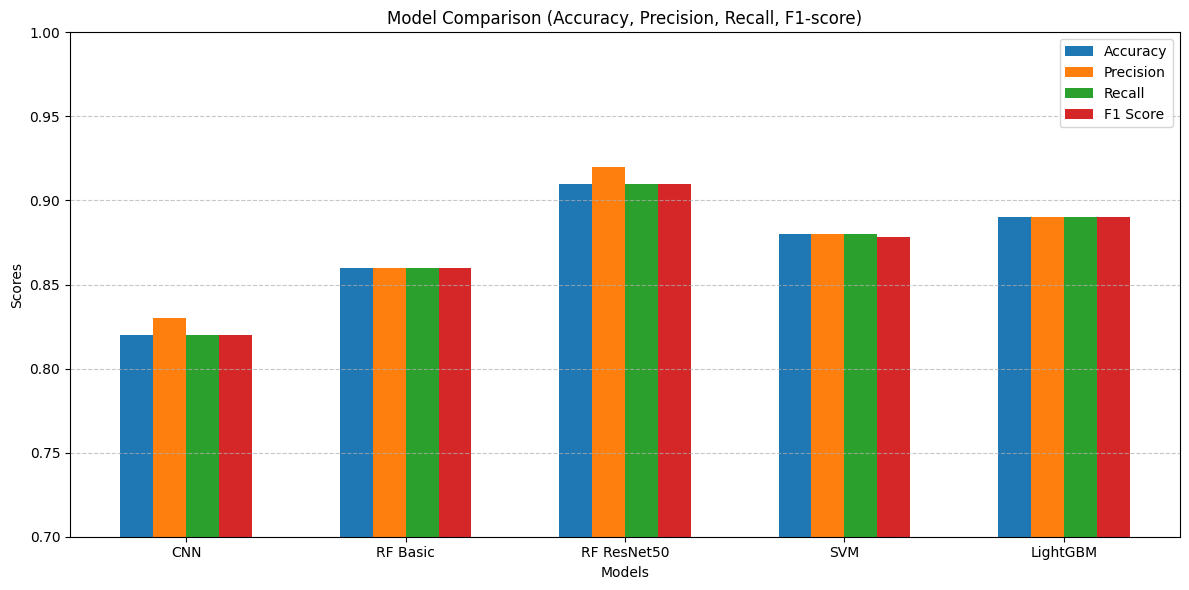

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data — replace with your actual values from classification reports
models = ['CNN', 'RF Basic', 'RF ResNet50', 'SVM', 'LightGBM']

# Replace these with your actual computed values
accuracy = [0.82, 0.86, 0.91, 0.88, 0.89]  # from accuracy_score()
precision = [0.83, 0.86, 0.92, 0.88, 0.89]  # average='macro' from classification_report
recall = [0.82, 0.86, 0.91,0.88, 0.89]     # average='macro'
f1_score = [0.82, 0.86, 0.91, 0.878, 0.89]   # average='macro'
support = [len(models)*100]*5  # Optional — dummy support, or use actual values

# Plot settings
bar_width = 0.15
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar(index + bar_width, precision, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score')

# Customization
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison (Accuracy, Precision, Recall, F1-score)')
plt.xticks(index + 1.5 * bar_width, models)
plt.ylim(0.7, 1.0)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

In [ ]:
joblib.dump(lgb, 'LightGB.joblib')

['LightGB.joblib']

In [ ]:
joblib.dump(lgb, 'LightGB.pkl')

['LightGB.pkl']

In [ ]:
joblib.dump(lgb, 'LightGB.pkl')